In [1]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from source.acquire_m import *
from source.prepare import preprocess_bioactivity_data
from source.model_marley import *
from scipy import stats as scs


%load_ext autoreload
%autoreload 2

RDKit WARNING: [09:15:10] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
wrangle_obj = wrangle('Coronavirus')

In [3]:
acquire_df = wrangle_obj.acquire_data()
acquire_df

,index,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,0,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.000,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
1,1,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.000,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
2,2,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.000,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [5]:
bioactivity_df = wrangle_obj.get_bioactivity_data()
bioactivity_df

List of single protein ChEMBL ID's from chosen disease:
0       CHEMBL3927
1       CHEMBL5118
2    CHEMBL4523582
Name: target_chembl_id, dtype: object
Input a single protein target ID from the list:CHEMBL3927


,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
activity_comment,,,,,,,,,,,,,,,,,,,,,
NaN,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,7.200
NaN,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,9.400
NaN,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,13.500
NaN,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,13.110
NaN,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,NaN,NaN,BAO_0000190,BAO_0000019,assay format,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,10.600
NaN,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,NaN,NaN,BAO_0000190,BAO_0000019,assay format,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,10.100
NaN,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,NaN,NaN,BAO_0000190,BAO_0000019,assay format,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,11.500


In [6]:
wrangle_obj.prepare_dataframe()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,"7,200.000",INTERMEDIATE,281.271,1.893,0.000,5.000,5.143
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,"9,400.000",INTERMEDIATE,415.589,3.813,0.000,2.000,5.027
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,"13,500.000",INACTIVE,421.190,2.661,0.000,4.000,4.870
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,"13,110.000",INACTIVE,293.347,3.631,0.000,3.000,4.882
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],"2,000.000",INTERMEDIATE,338.344,3.539,0.000,5.000,5.699
...,...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,"10,600.000",INACTIVE,338.359,3.401,0.000,5.000,4.975
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,"10,100.000",INACTIVE,296.366,3.443,0.000,3.000,4.996
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,"11,500.000",INACTIVE,276.291,4.096,0.000,3.000,4.939
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,"10,700.000",INACTIVE,278.307,3.291,0.000,3.000,4.971


In [ ]:
wrangle_obj.preprocess_bioactivity_data(tests = True)

Saving 133 molecules.

Mann-Whitney U tests for molecular descriptors (active vs. inactive)...

 MW
   H statistic = 12, p = 0.002
   Different distribution. Reject H0.

 LogP
   H statistic = 1, p = 0.644
   Same distribution. Fail to reject H0.

 NumHDonors
   H statistic = 23, p = 0.000
   Different distribution. Reject H0.

 NumHAcceptors
   H statistic = 13, p = 0.002
   Different distribution. Reject H0.

Computing fingerprints (takes several minutes if molecules > 1000)...


In [25]:
target_id = wrangle_obj.user_target

In [26]:
bioactivity_df = pd.read_csv(f'{target_id}_bioactivity_preprocessed.csv')
bioactivity_df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,"7,200.000",INTERMEDIATE,281.271,1.893,0.000,5.000,5.143
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,"9,400.000",INTERMEDIATE,415.589,3.813,0.000,2.000,5.027
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,"13,500.000",INACTIVE,421.190,2.661,0.000,4.000,4.870
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,"13,110.000",INACTIVE,293.347,3.631,0.000,3.000,4.882
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],"2,000.000",INTERMEDIATE,338.344,3.539,0.000,5.000,5.699


In [128]:
bioactivity_df.shape

(224, 9)

In [6]:
fingerprint_df = pd.read_csv(f'{target_id}_pubchem_fp.csv')
fingerprint_df.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL410620,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL433630,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL412645,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL290601,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL287884,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fingerprint_df.shape

(29, 882)

Three representations of molecule CHEMBL39346:
1. SMILES notation: CC(C)=C[C@H]1c2[nH]c3ccccc3c2C[C@H]2C(=O)N3CCC[C@H]3C(=O)N21
2. Chemical fingerprint: [1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0

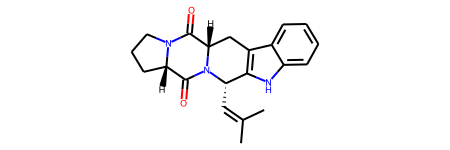

In [8]:
mol = 'CHEMBL39346'
SMILES = bioactivity_df.canonical_smiles[bioactivity_df.molecule_chembl_id==mol].values[0]
fingerprint = np.array(fingerprint_df[fingerprint_df.Name==mol])[0][1:]

print(f'Three representations of molecule {mol}:')
print('1. SMILES notation:', SMILES)
print('2. Chemical fingerprint:', fingerprint)
print('3. Molecular Visualization')
Chem.MolFromSmiles(SMILES) #an example molecule

<a id='Model'></a>
## 4. Modeling the chemical fingerprints

In this part, we use machine learning to determine the charchteristics of molecules with a high chance of being viable drug candidates.

A note on modeling: $R^2$ is the percent of the variance in [potency](https://en.wikipedia.org/wiki/Potency_(pharmacology)) (as measured by $pIC_{50}$) is explained by the chemical fingerprint of the molecule.

In [99]:
# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [100]:
modeling_df, target = premodeling_processing(bioactivity_df, fingerprint_df)
modeling_df.head()

,molecule_id,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL410620,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,351.450,3.013,1.000,2.000
1,CHEMBL433630,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,461.518,3.041,1.000,5.000
2,CHEMBL412645,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,407.426,1.863,3.000,5.000
3,CHEMBL290601,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,351.450,3.013,1.000,2.000
4,CHEMBL287884,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,449.507,2.835,2.000,5.000


In [101]:
target.head()

,pIC50,bioactivity_class,standard_value
0,4.060,0,"87,096.360"
1,4.010,0,"97,723.720"
2,4.000,0,"100,000.000"
3,4.200,0,"63,095.730"
4,4.020,0,"95,499.260"


In [102]:
names = ['Linear Regressor']
models = [LinearRegression(normalize = True)]

In [93]:
model_obj = Modeling_class(modeling_df, target, models, names)

In [94]:
avg_metrics, avg_met_dict, outputs = model_obj.regression_modeling(splits = 10)

Have not run scaling method yet, running now...
All done! Applying variance threshold then moving on to modeling, this may take a while...
Modeling done! Average scores are abstract represntations of how well this model type did, not actual scores.


In [95]:
model_obj.reg_target

0     4.060
1     4.010
2     4.000
3     4.200
4     4.020
5     4.000
6     4.430
7     4.000
8     4.430
9     4.000
10    4.310
11    4.440
12    4.050
13    4.000
14    4.050
15    4.000
16    4.000
17    4.470
18    4.310
19    4.330
20    4.560
21    4.330
22    4.030
23   10.000
24    8.658
25    9.000
26    6.051
27    6.420
28    8.796
29    6.201
30    6.292
31    6.180
32    6.292
33    6.180
34    6.377
Name: pIC50, dtype: float64

In [96]:
outputs

[{'fit_time': array([0.00545096, 0.00236583, 0.00198507, 0.00175166, 0.00295997,
         0.00242925, 0.00311828, 0.00553393, 0.00444698, 0.00241995]),
  'score_time': array([0.00294495, 0.00144219, 0.00186586, 0.00496817, 0.00159311,
         0.0016427 , 0.00141883, 0.00165296, 0.00183892, 0.0021019 ]),
  'estimator': [LinearRegression(normalize=True),
   LinearRegression(normalize=True),
   LinearRegression(normalize=True),
   LinearRegression(normalize=True),
   LinearRegression(normalize=True),
   LinearRegression(normalize=True),
   LinearRegression(normalize=True),
   LinearRegression(normalize=True),
   LinearRegression(normalize=True),
   LinearRegression(normalize=True)],
  'test_neg_root_mean_squared_error': array([-0.04169938, -0.2507323 , -0.40943299, -0.58499032, -0.46401289,
         -0.34495658, -2.92534589, -0.38655774, -0.20559841, -0.36834165]),
  'test_r2': array([ 9.98316481e-01, -4.41162610e-01,  8.18854781e-01,  9.35248122e-01,
          7.81790600e-01,  9.1768754

In [97]:
avg_metrics

avg_score
model            metric                                
Linear Regressor neg_root_mean_squared_error      0.598
                 r2                             137.027

In [72]:
avg_met_dict

{'model_type': ['Linear Regressor', 'Linear Regressor'],
 'metric': ['neg_root_mean_squared_error', 'r2'],
 'avg_score': [0.5981669999999999, 137.026586]}

In [98]:
model_obj.scaled_df

,MW,LogP,NumHDonors,NumHAcceptors
0,0.116,0.214,0.250,0.045
1,0.236,0.219,0.250,0.182
2,0.177,0.000,0.750,0.182
3,0.116,0.214,0.250,0.045
4,0.223,0.181,0.500,0.182
5,0.221,0.163,0.500,0.182
6,0.113,0.199,0.250,0.045
7,0.113,0.199,0.250,0.045
8,0.113,0.199,0.250,0.045
9,0.113,0.199,0.250,0.045
